In [1]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [2]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [3]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

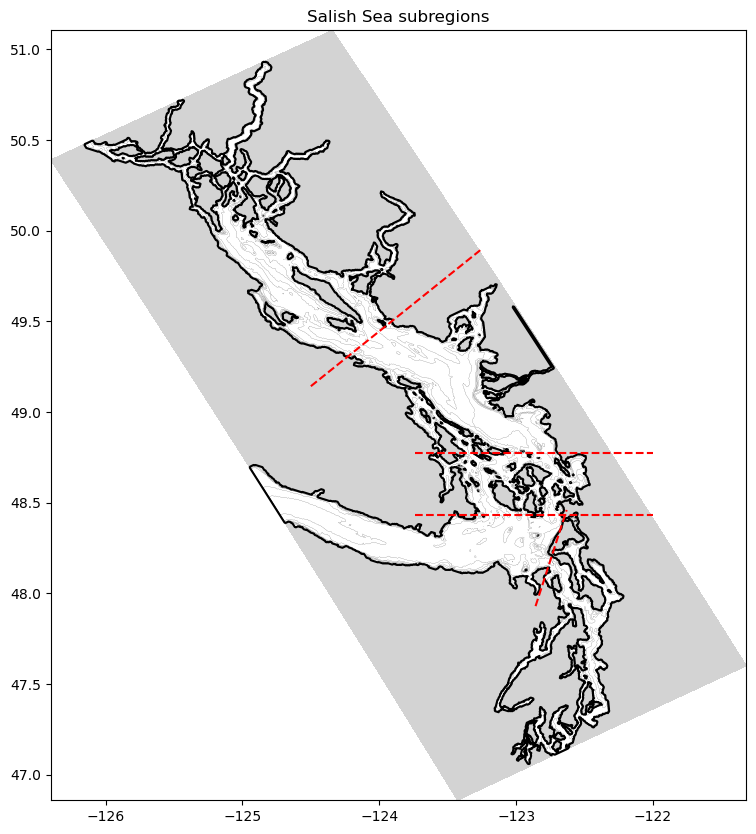

In [4]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [5]:
def counting(DS,month,axs,fact=1):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DS.time)+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(x2,np.array(count)/fact,label = month)
    axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
    twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
    axs[1,0].set_ylim([-1e4,6e4])
    twin3.set_ylim([-1e4,6e4])
    beached = [(c - countb[i-1])*4/(count[i-1]) for i,c in enumerate(countb)]#*4 to give the units in day-1
    sediment = [(c - counte[i-1])*4/(count[i-1]) for i,c in enumerate(counte)]
    beached = np.array(beached)
    for i,b in enumerate(beached):
        if b==0:
            beached[i]=(beached[i-1]+beached[i+1])/2
    sediment = np.array(sediment)
    for i,b in enumerate(sediment):
        if b==0:
            sediment[i]=(sediment[i-1]+sediment[i+1])/2
    axs[0,1].plot(moving_average(x2[1:],10),moving_average(1/beached[1:],10),'-',label = 'Beaching rate')
    # twin1.plot(x2,depthb,'--',la(bel = 'Avg Depth')
    axs[1,1].plot(moving_average(x[1:],10),moving_average(1/sediment[1:],10),label = 'Sedimentation rate')
    return #count,counte,countb,beached,sediment

In [6]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

Source = pd.read_csv('Outfall_deploy.csv')

In [7]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro2','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123.456) & (data['lon']<-123)]
    elif area=='Haro2':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new


def cutting_source(data,area):
    if area=='Puget':
        deploy = data.loc[(data['Lat']<48.43) & (data['Lat']<(7/3)*data['Lon']+334.6)].deploy.sum()
    elif area=='JdF':
        deploy = pd.concat([data.loc[((data['Lat']<48.43) & (data['Lat']>(7/3)*data['Lon']+334.6))],data.loc[((data['Lat']>48.43) & (data['Lat']<48.774) & (data['Lon']<-124))]]).deploy.sum()
    elif area=='Haro':  
        deploy = data.loc[(data['Lat']>48.43) & (data['Lat']<48.774) & (data['Lon']>-123.456) & (data['Lon']<-123)].deploy.sum()
    elif area=='Haro2':  
        deploy = data.loc[(data['Lat']>48.43) & (data['Lat']<48.774) & (data['Lon']>-124)].deploy.sum() 
    elif area=='NSoG':
        deploy = data.loc[(data['Lat']>(20/33)*data['Lon']+124.597)].deploy.sum()
    elif area=='CSSoG': 
        deploy = data.loc[(data['Lat']>48.774)&(data['Lat']<(20/33)*data['Lon']+124.597)].deploy.sum()
    else:
        print('Unrecognized subarea')  
        deploy = data.deploy.sum()
    return deploy

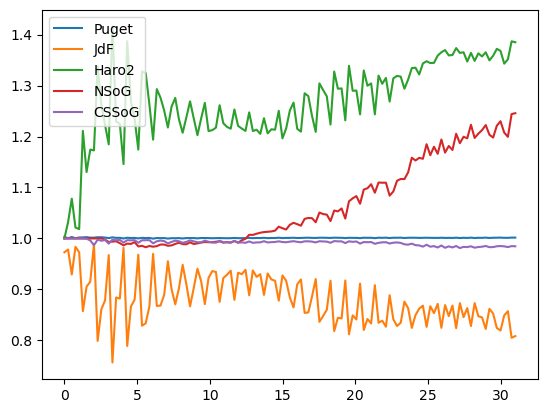

In [8]:
Source['deploy']=round((Source.Population*250*10)/5e6,0)
alpha='5,000 s'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    deploys = cutting_source(Source,area)
    count = []
    depcount = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        depcount.append((times/3600)//10)
        count.append(len(DSn[DSn.time == times]))
        exchange = (np.array(count)/(np.array(depcount)+1))/deploys
    plt.plot(x,exchange,label=area)
plt.legend()

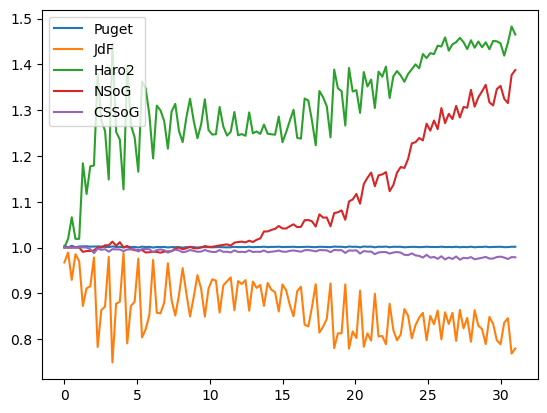

In [9]:
Source['deploy']=round((Source.Population*250*10)/1e7,0)
alpha='50,000 s'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    deploys = cutting_source(Source,area)
    count = []
    depcount = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        depcount.append((times/3600)//10)
        count.append(len(DSn[DSn.time == times]))
        exchange = (np.array(count)/(np.array(depcount)+1))/deploys
    plt.plot(x,exchange,label=area)
plt.legend()

In [10]:
alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}

### This checks budget vs $\alpha$

In [13]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(runs):
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(1e7/runs[alpha][1]),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting_source(Source,area)
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*1e7/runs[alpha][1]-(np.array(depcount)+1)*deploys*1e7/runs[alpha][1])/(np.array(timer)*alphs[alpha]))[-40:]
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

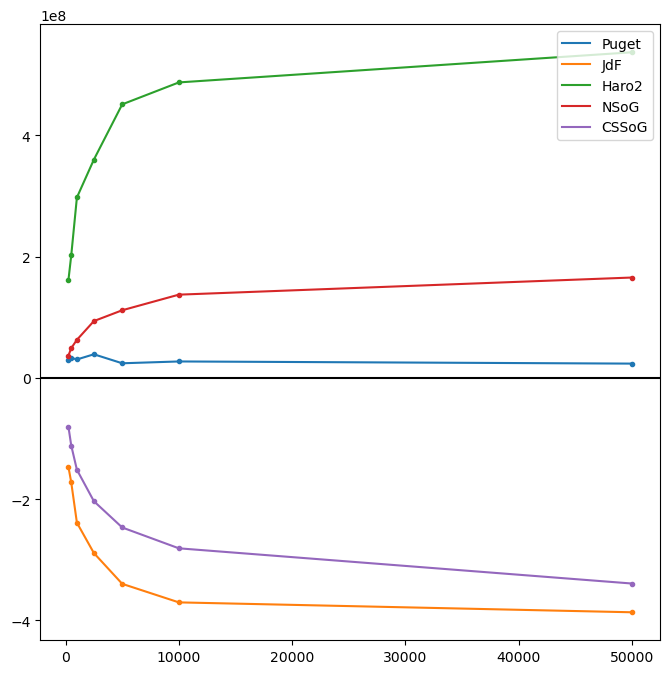

In [14]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
plt.plot(list(alphs.values()),meanll,linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

In [18]:
clist = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
meanll = []
stdll = []
for ii,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(5e6),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    meanl = []
    stdl = []
    for jj, area in enumerate(sub_areas):
        DSn = cutting(DS,area)
        deploys = cutting_source(Source,area)
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        count = ((np.array(count)*5e6-(np.array(depcount)+1)*deploys*5e6)/(np.array(timer)))
        meanl.append(np.mean(count)) #exchange per second
        stdl.append(np.std(count))
    meanll.append(meanl)
    stdll.append(stdl)

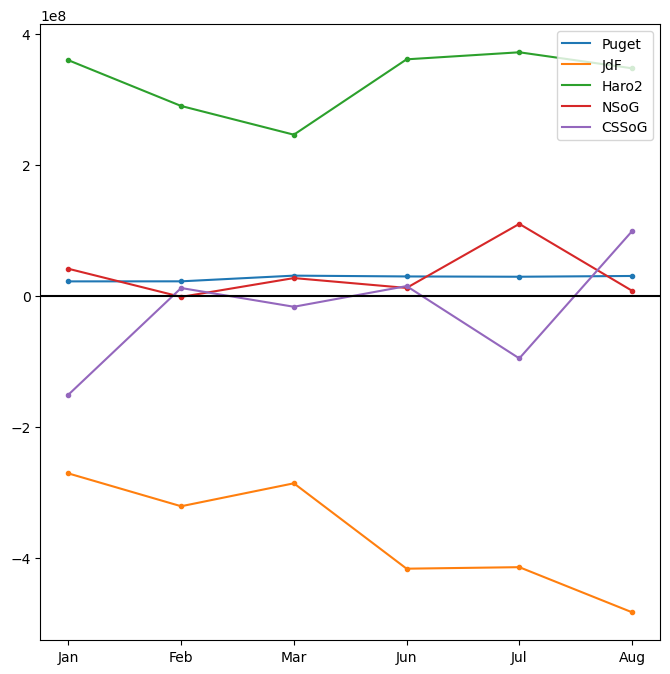

In [22]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
plt.plot(list(months.keys()),meanll,linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

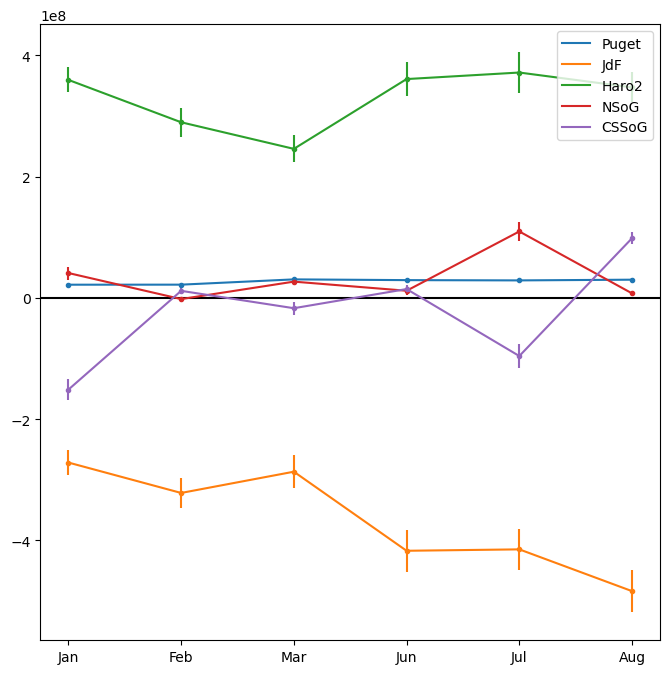

In [35]:
fig,axs = plt.subplots(1,1,figsize=(8,8))
for i,area in enumerate(sub_areas):
    plt.errorbar(list(months.keys()),np.array(meanll).T[i],np.array(stdll).T[i]/len(stdll[0]),linestyle='-',marker='.')
legend_lines = [plt.Line2D([0], [0], color=clist[0], linestyle='-'),plt.Line2D([0], [0], color=clist[1], linestyle='-'),plt.Line2D([0], [0], color=clist[2], linestyle='-'),plt.Line2D([0], [0], color=clist[3], linestyle='-'),plt.Line2D([0], [0], color=clist[4], linestyle='-')]
plt.axhline(y=0,color='black')
plt.legend(legend_lines,sub_areas, loc = 'upper right')

In [43]:
np.array(meanll).T[0]*13.7

array([2.99498806e+08, 3.00554568e+08, 4.19640357e+08, 4.02815472e+08,
       3.96676553e+08, 4.12741395e+08])

Parker's 2021 flow

In [59]:
meane = 40.9e3
df = 4.7e3
exch= np.linspace(meane+df,meane-df,8)

exch= list(exch[:3])+list(exch[-3:])
np.array(meanll).T[0]*13.7/(np.array(exch)*86400)

array([0.07601801, 0.07860066, 0.1131779 , 0.11989534, 0.12229127,
       0.13196407])

In [82]:
conc1 = np.load(path_runs+'Run_Enero20190101_.npy')*13.7
ii,jj = finder(jjii,48.145078973929365, -122.75094025918668)

In [85]:
jj

254

<xarray.DataArray 'nav_lon' (x: 398)>
[398 values with dtype=float32]
Dimensions without coordinates: x

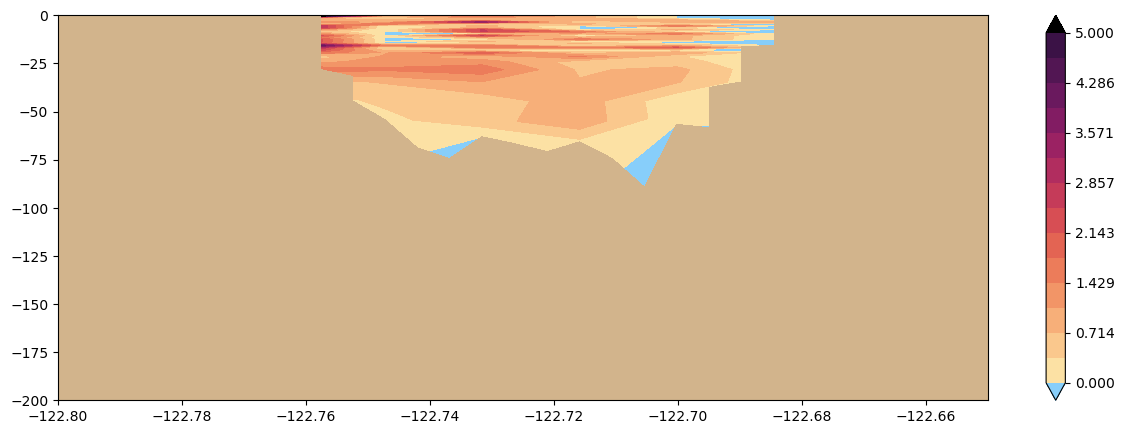

In [94]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
Ni = 3
levels = np.linspace(0, 5, 15)
#Lon,Depth = np.meshgrid(coords.nav_lon[ii,::Ni],mask.gdept_0[0,:,ii,0])
Lon2,Depth = np.meshgrid(coords.nav_lon[ii,:],mask.gdept_0[0,:,ii,0])
#Lon,Depth = np.meshgrid(coords.nav_lat[::Ni,jj],mask.gdept_0[0,:,0,jj])
ac = plt.contourf(Lon,-mask.gdept_0[0,:,ii,::Ni],conc1[:,int(ii/3),:],levels=levels,cmap=cmocean.cm.matter,extend='both')
#ac = plt.contourf(Lon,-mask.gdept_0[0,:,::Ni,jj],conc_winter[:,:,int(jj/3)],levels=levels,cmap=cmocean.cm.matter,extend='both')
ax.contourf(Lon2,-mask.gdept_0[0,:,ii,:], mask.tmask[0,:,ii,:], levels=[-0.01, 0.01], colors='tan')
ac.cmap.set_over('black')
ac.cmap.set_under('lightskyblue')
plt.ylim([-200,0])
plt.xlim([  -122.8, -122.65])
plt.colorbar(ac)

1.6839529560345066
-8.327571236877422
9.422053832188816
1.5128265845765205
-4.291262135922349
1.9182255900229754
-9.445733680637781
11.011287394427347
1.891546294103713
-5.37532559791613
1.6639040176810156
-12.813955324019252
16.204909621911767
2.3924540216275925
-7.447312337200974
2.066777172626178
-15.248243744573367
19.13963217302077
3.721840713552765
-9.680006314626265
1.2562948930459628
-17.60059988949404
23.51393164417082
4.178546057305236
-11.34817270502804
1.3967953271765405
-19.14373668008524
25.313442260636204
5.257557818296632
-12.824058726024141
1.3339647959586047
-20.012944983818773
27.370116031257403
6.287473360170491
-14.978609203567778


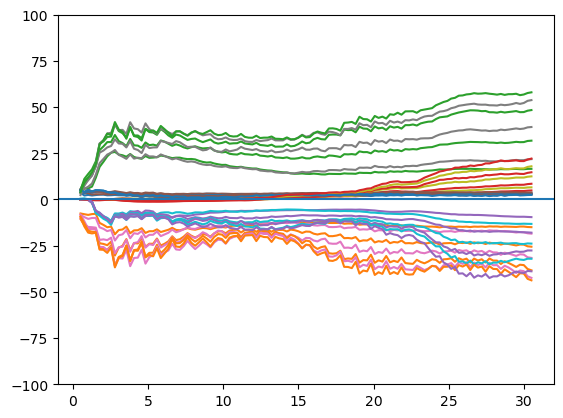

In [44]:
#alpha='50,000 s'

for jj,alpha in enumerate(runs):
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(1e7/runs[alpha][1]),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    for area in sub_areas:
        DSn = cutting(DS,area)
        deploys = cutting_source(Source,area)
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        plt.plot(moving_average(x,5),moving_average((np.array(count)-(np.array(depcount)+1)*deploys)/(np.array(timer)*runs[alpha][1]),5),label=area) 
        plt.ylim([-100,100]) 
        print((np.mean(count[20:])-(np.mean(depcount[20:])+1)*deploys)/(runs[alpha][1]*times/86400))  
plt.axhline(y=0) 
axs[0,0].legend()

2.5125897860919255
-35.20119977898808
47.02786328834164
8.357092114610472
-22.69634541005608
2.4785664785663317
-44.31996831996832
41.235125235125224
0.4399564399564288
0.166320166320368
3.567132370352908
-42.44060304680717
34.93598547635962
5.227879074907256
-1.2903938748125117
3.6079596079595446
-60.14968814968813
50.9054549054549
4.033660033660036
1.602613602613617
3.5762795762794495
-59.65429165429164
54.67933867933869
18.42193842193841
-17.023265023264816
3.883971883971737
-68.26254826254825
47.653103653103656
1.5083655083655014
15.217107217107335


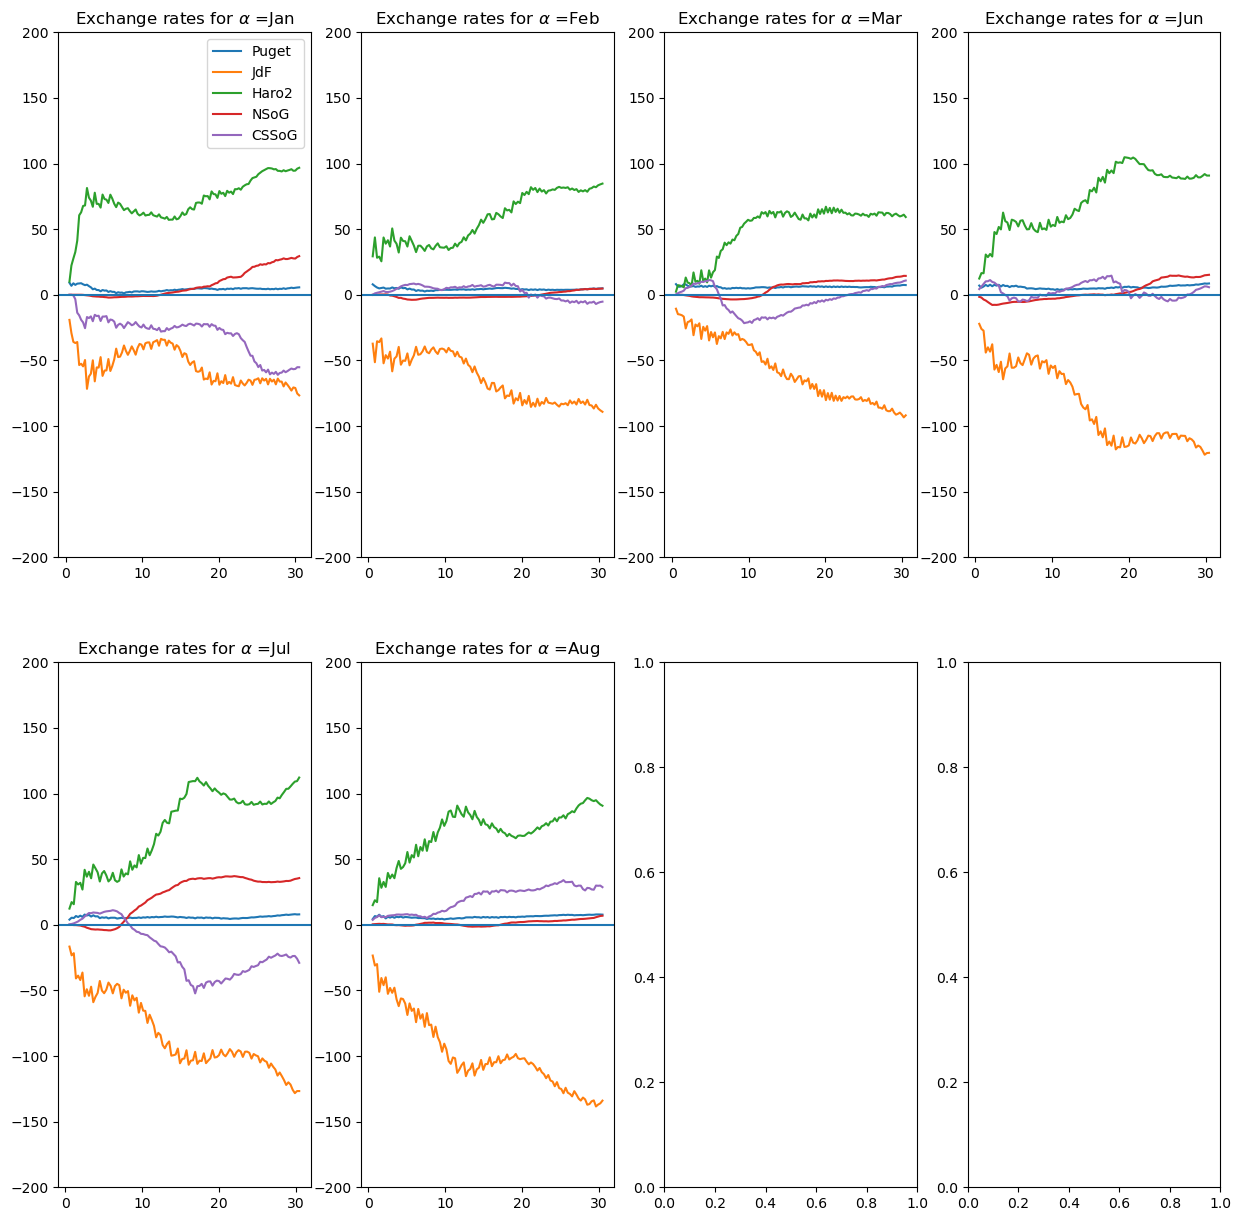

In [41]:
#alpha='50,000 s'
fig,axs = plt.subplots(2,4,figsize=(15,15))
for jj,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(1e7/2),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    for area in sub_areas:
        DSn = cutting(DS,area)
        deploys = cutting_source(Source,area)
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        axs[jj//4,jj%4].plot(moving_average(x,5),moving_average((np.array(count)-(np.array(depcount)+1)*deploys)/(np.array(timer)*runs[alpha][1]),5),label=area) 
        axs[jj//4,jj%4].set_ylim([-100,100]) 
        print((np.mean(count[20:])-(np.mean(depcount[20:])+1)*deploys)/(runs[alpha][1]*times/86400))  
    axs[jj//4,jj%4].axhline(y=0) 
    axs[jj//4,jj%4].set_title(r'Exchange rates for $\alpha$ ='+f'{alpha}') 
axs[0,0].legend()